In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

%matplotlib inline

# Import the three datasets

In [2]:
movies_df=pd.read_csv(r"C:\Users\sbodicherla164331\Desktop\Simplilearn\Python\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1/movies.dat",sep="::",names=['MovieID','Title','Genres'])

<ipython-input-2-05cf7367be2b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df=pd.read_csv(r"C:\Users\sbodicherla164331\Desktop\Simplilearn\Python\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1/movies.dat",sep="::",names=['MovieID','Title','Genres'])


In [3]:
movies_df.head()


MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [4]:
ratings_df=pd.read_csv(r"C:\Users\sbodicherla164331\Desktop\Simplilearn\Python\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1/ratings.dat",sep="::",names=['UserID','MovieID','Rating','Timestamp'])

<ipython-input-4-456df6f2a805>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df=pd.read_csv(r"C:\Users\sbodicherla164331\Desktop\Simplilearn\Python\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1/ratings.dat",sep="::",names=['UserID','MovieID','Rating','Timestamp'])


In [5]:
ratings_df.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [6]:
users_df=pd.read_csv(r"C:\Users\sbodicherla164331\Desktop\Simplilearn\Python\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1/users.dat",sep="::",names=['UserID','Gender','Age','Occupation','Zip-code'])

<ipython-input-6-5d4c0ed433a8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df=pd.read_csv(r"C:\Users\sbodicherla164331\Desktop\Simplilearn\Python\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1/users.dat",sep="::",names=['UserID','Gender','Age','Occupation','Zip-code'])


In [7]:
users_df.head()


UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [8]:
df_1_2=pd.merge(movies_df,ratings_df, on='MovieID',how='inner')
df_1_2

MovieID                  Title                       Genres  UserID  \
0              1       Toy Story (1995)  Animation|Children's|Comedy       1   
1              1       Toy Story (1995)  Animation|Children's|Comedy       6   
2              1       Toy Story (1995)  Animation|Children's|Comedy       8   
3              1       Toy Story (1995)  Animation|Children's|Comedy       9   
4              1       Toy Story (1995)  Animation|Children's|Comedy      10   
...          ...                    ...                          ...     ...   
1000204     3952  Contender, The (2000)               Drama|Thriller    5812   
1000205     3952  Contender, The (2000)               Drama|Thriller    5831   
1000206     3952  Contender, The (2000)               Drama|Thriller    5837   
1000207     3952  Contender, The (2000)               Drama|Thriller    5927   
1000208     3952  Contender, The (2000)               Drama|Thriller    5998   

         Rating   Timestamp  
0             5   978824268  
1             4   978237008  
2             4   978233496  
3             5   978225952  
4             5   978226474  
...         ...         ...  
1000204       4   992072099  
1000205       3   986223125  
1000206       4  1011902656  
1000207       1   979852537  
1000208       4  1001781044  

[1000209 rows x 6 columns]

In [9]:
master_df=pd.merge(df_1_2,users_df,on='UserID',how='inner')

In [10]:
master_df.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp Gender  \
0           Animation|Children's|Comedy       1       5  978824268      F   
1  Animation|Children's|Musical|Romance       1       5  978824351      F   
2                                 Drama       1       5  978301777      F   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760      F   
4                             Drama|War       1       5  978824195      F   

   Age  Occupation Zip-code  
0    1          10    48067  
1    1          10    48067  
2    1          10    48067  
3    1          10    48067  
4    1          10    48067

In [11]:
master_df.shape

(1000209, 10)

In [12]:
master_df_final=master_df.drop(['Genres','Timestamp','Zip-code'],axis=1)

In [13]:
master_df_final.head()

MovieID                                      Title  UserID  Rating Gender  \
0        1                           Toy Story (1995)       1       5      F   
1       48                          Pocahontas (1995)       1       5      F   
2      150                           Apollo 13 (1995)       1       5      F   
3      260  Star Wars: Episode IV - A New Hope (1977)       1       4      F   
4      527                    Schindler's List (1993)       1       5      F   

   Age  Occupation  
0    1          10  
1    1          10  
2    1          10  
3    1          10  
4    1          10

In [14]:
master_df_final.shape

(1000209, 7)

# User Age Distribution

In [15]:
group_1=users_df.groupby(['Age']).size()

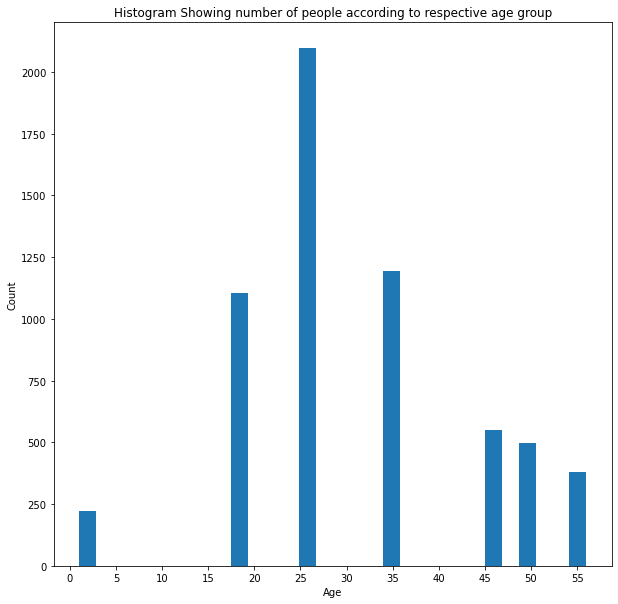

In [16]:
figure(figsize=(10,10))
plt.hist(users_df['Age'],bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram Showing number of people according to respective age group')
plt.xticks(np.arange(0,60,5))  
plt.show()#The Age (25-34) is the group with highest number of people

# User rating of the movie “Toy Story”

In [17]:
master_df_final.head()

MovieID                                      Title  UserID  Rating Gender  \
0        1                           Toy Story (1995)       1       5      F   
1       48                          Pocahontas (1995)       1       5      F   
2      150                           Apollo 13 (1995)       1       5      F   
3      260  Star Wars: Episode IV - A New Hope (1977)       1       4      F   
4      527                    Schindler's List (1993)       1       5      F   

   Age  Occupation  
0    1          10  
1    1          10  
2    1          10  
3    1          10  
4    1          10

In [18]:
master_rating_df=master_df_final[master_df_final['Title'].str.match('^Toy S*')== True].reset_index()
master_rating_df.drop('index',axis=1,inplace=True)
master_rating_df.head()

MovieID               Title  UserID  Rating Gender  Age  Occupation
0        1    Toy Story (1995)       1       5      F    1          10
1     3114  Toy Story 2 (1999)       1       4      F    1          10
2        1    Toy Story (1995)       6       4      F   50           9
3        1    Toy Story (1995)       8       4      M   25          12
4        1    Toy Story (1995)       9       5      M   25          17

<AxesSubplot:xlabel='Title'>

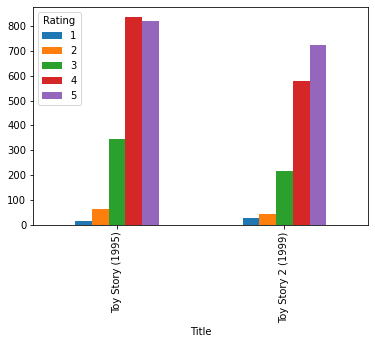

In [86]:
master_rating_df.groupby(['Title','Rating']).size().unstack().plot(kind='bar')

# Top 25 movies by viewership rating

In [20]:
master_group=master_df_final.groupby(['Title']).agg({'Rating':'mean'}).sort_values(ascending=False,by='Rating').head(25)

In [21]:
master_group

Rating
Title                                                       
Ulysses (Ulisse) (1954)                             5.000000
Lured (1947)                                        5.000000
Follow the Bitch (1998)                             5.000000
Bittersweet Motel (2000)                            5.000000
Song of Freedom (1936)                              5.000000
One Little Indian (1973)                            5.000000
Smashing Time (1967)                                5.000000
Schlafes Bruder (Brother of Sleep) (1995)           5.000000
Gate of Heavenly Peace, The (1995)                  5.000000
Baby, The (1973)                                    5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 4.800000
Lamerica (1994)                                     4.750000
Apple, The (Sib) (1998)                             4.666667
Sanjuro (1962)                                      4.608696
Seven Samurai (The Magnificent Seven) (Shichini...  4.560510
Shawshank Redemption, The (1994)                    4.554558
Godfather, The (1972)                               4.524966
Close Shave, A (1995)                               4.520548
Usual Suspects, The (1995)                          4.517106
Schindler's List (1993)                             4.510417
Wrong Trousers, The (1993)                          4.507937
Dry Cleaning (Nettoyage à sec) (1997)               4.500000
Inheritors, The (Die Siebtelbauern) (1998)          4.500000
Mamma Roma (1962)                                   4.500000
Bells, The (1926)                                   4.500000

<AxesSubplot:xlabel='Title'>

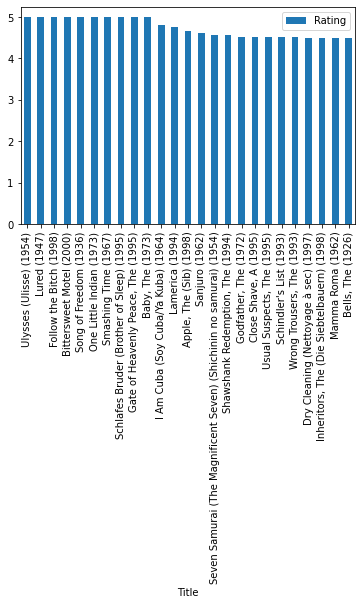

In [22]:
master_df_final.groupby(['Title']).agg({'Rating':'mean'}).sort_values(ascending=False,by='Rating').head(25).plot(kind='bar')

In [23]:
master_df_final.groupby(['Title','Rating']).size().sort_values(ascending=False).head(25)

Title                                                  Rating
American Beauty (1999)                                 5         1963
Star Wars: Episode IV - A New Hope (1977)              5         1826
Raiders of the Lost Ark (1981)                         5         1500
Star Wars: Episode V - The Empire Strikes Back (1980)  5         1483
Godfather, The (1972)                                  5         1475
Schindler's List (1993)                                5         1475
Shawshank Redemption, The (1994)                       5         1457
Matrix, The (1999)                                     5         1430
Saving Private Ryan (1998)                             5         1405
Sixth Sense, The (1999)                                5         1385
Silence of the Lambs, The (1991)                       5         1350
Fargo (1996)                                           5         1278
Braveheart (1995)                                      5         1206
Pulp Fiction (1994)         

# Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [24]:
master_df_final[master_df_final['UserID']==2696][['Title','Rating']]

Title  Rating
991035                              Client, The (1994)       3
991036                                Lone Star (1996)       5
991037                           Basic Instinct (1992)       4
991038               E.T. the Extra-Terrestrial (1982)       3
991039                             Shining, The (1980)       4
991040                       Back to the Future (1985)       2
991041                                 Cop Land (1997)       3
991042                        L.A. Confidential (1997)       4
991043                                Game, The (1997)       4
991044          I Know What You Did Last Summer (1997)       2
991045                    Devil's Advocate, The (1997)       4
991046  Midnight in the Garden of Good and Evil (1997)       4
991047                                 Palmetto (1998)       4
991048                              Wild Things (1998)       4
991049                        Perfect Murder, A (1998)       4
991050    I Still Know What You Did Last Summer (1998)       2
991051                                   Psycho (1998)       4
991052                              Lake Placid (1999)       1
991053                 Talented Mr. Ripley, The (1999)       4
991054                                      JFK (1991)       1

# Feature Engineering:Use column genres:Find out all the unique genres 
(Hint: split the data in column genre making a list and then process the data to find out only the unique 
 categories of genres)

In [25]:
master_df['Genres']

0                   Animation|Children's|Comedy
1          Animation|Children's|Musical|Romance
2                                         Drama
3               Action|Adventure|Fantasy|Sci-Fi
4                                     Drama|War
                           ...                 
1000204                          Drama|Thriller
1000205                  Comedy|Horror|Thriller
1000206                          Comedy|Romance
1000207                         Action|Thriller
1000208                            Action|Drama
Name: Genres, Length: 1000209, dtype: object

In [26]:
master_df.assign(Genres=master_df.Genres.str.split('|')).explode('Genres')['Genres'].unique()


array(['Animation', "Children's", 'Comedy', 'Musical', 'Romance', 'Drama',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Crime',
       'Thriller', 'Western', 'Horror', 'Mystery', 'Documentary',
       'Film-Noir'], dtype=object)

# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [27]:
dummies=master_df.Genres.str.get_dummies("|")

In [28]:
master_df=pd.concat([master_df,dummies],axis=1)
master_df.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp Gender  \
0           Animation|Children's|Comedy       1       5  978824268      F   
1  Animation|Children's|Musical|Romance       1       5  978824351      F   
2                                 Drama       1       5  978301777      F   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760      F   
4                             Drama|War       1       5  978824195      F   

   Age  Occupation Zip-code  ...  Fantasy  Film-Noir  Horror  Musical  \
0    1          10    48067  ...        0          0       0        0   
1    1          10    48067  ...        0          0       0        1   
2    1          10    48067  ...        0          0       0        0   
3    1          10    48067  ...        1          0       0        0   
4    1          10    48067  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        1       0         0    0        0  
2        0        0       0         0    0        0  
3        0        0       1         0    0        0  
4        0        0       0         0    1        0  

[5 rows x 28 columns]

In [29]:
master_df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

# Determine the features affecting the ratings of any particular movie.

In [30]:
#1.Correlation of the Variables with the target Variable

In [31]:
master_df.columns


Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [32]:
#Replacing F and M into 1 and 0 and converting the column into numerical Value as numerical variables can be used into the model

In [33]:
master_df.Gender

0          F
1          F
2          F
3          F
4          F
          ..
1000204    M
1000205    M
1000206    M
1000207    M
1000208    M
Name: Gender, Length: 1000209, dtype: object

In [34]:
master_df['Gender'].replace({'F':1,'M':0},inplace=True)

In [35]:
master_df.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp  Gender  \
0           Animation|Children's|Comedy       1       5  978824268       1   
1  Animation|Children's|Musical|Romance       1       5  978824351       1   
2                                 Drama       1       5  978301777       1   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760       1   
4                             Drama|War       1       5  978824195       1   

   Age  Occupation Zip-code  ...  Fantasy  Film-Noir  Horror  Musical  \
0    1          10    48067  ...        0          0       0        0   
1    1          10    48067  ...        0          0       0        1   
2    1          10    48067  ...        0          0       0        0   
3    1          10    48067  ...        1          0       0        0   
4    1          10    48067  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        1       0         0    0        0  
2        0        0       0         0    0        0  
3        0        0       1         0    0        0  
4        0        0       0         0    1        0  

[5 rows x 28 columns]

In [36]:
#Converting to integer

type(master_df["Gender"])


pandas.core.series.Series

In [37]:
pd.to_numeric(master_df["Gender"])

0          1
1          1
2          1
3          1
4          1
          ..
1000204    0
1000205    0
1000206    0
1000207    0
1000208    0
Name: Gender, Length: 1000209, dtype: int64

In [38]:
#dropping the timestamp,zipcode as they are not significant varibles

In [39]:
master_df_m=master_df.drop(['Zip-code','Timestamp'],axis=1)

In [40]:
master_df_m.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Gender  Age  \
0           Animation|Children's|Comedy       1       5       1    1   
1  Animation|Children's|Musical|Romance       1       5       1    1   
2                                 Drama       1       5       1    1   
3       Action|Adventure|Fantasy|Sci-Fi       1       4       1    1   
4                             Drama|War       1       5       1    1   

   Occupation  Action  Adventure  ...  Fantasy  Film-Noir  Horror  Musical  \
0          10       0          0  ...        0          0       0        0   
1          10       0          0  ...        0          0       0        1   
2          10       0          0  ...        0          0       0        0   
3          10       1          1  ...        1          0       0        0   
4          10       0          0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        1       0         0    0        0  
2        0        0       0         0    0        0  
3        0        0       1         0    0        0  
4        0        0       0         0    1        0  

[5 rows x 26 columns]

In [41]:
master_df_m.tail()

MovieID                       Title                  Genres  UserID  \
1000204     3513  Rules of Engagement (2000)          Drama|Thriller    5727   
1000205     3535      American Psycho (2000)  Comedy|Horror|Thriller    5727   
1000206     3536    Keeping the Faith (2000)          Comedy|Romance    5727   
1000207     3555                U-571 (2000)         Action|Thriller    5727   
1000208     3578            Gladiator (2000)            Action|Drama    5727   

         Rating  Gender  Age  Occupation  Action  Adventure  ...  Fantasy  \
1000204       4       0   25           4       0          0  ...        0   
1000205       2       0   25           4       0          0  ...        0   
1000206       5       0   25           4       0          0  ...        0   
1000207       3       0   25           4       1          0  ...        0   
1000208       5       0   25           4       1          0  ...        0   

         Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
1000204          0       0        0        0        0       0         1    0   
1000205          0       1        0        0        0       0         1    0   
1000206          0       0        0        0        1       0         0    0   
1000207          0       0        0        0        0       0         1    0   
1000208          0       0        0        0        0       0         0    0   

         Western  
1000204        0  
1000205        0  
1000206        0  
1000207        0  
1000208        0  

[5 rows x 26 columns]

In [42]:
new=master_df_m['Title'].str.extract(pat='\s\((\d+)')

In [43]:
new

0
0        1995
1        1995
2        1995
3        1977
4        1993
...       ...
1000204  2000
1000205  2000
1000206  2000
1000207  2000
1000208  2000

[1000209 rows x 1 columns]

In [44]:
master_df_m['Year']=new

In [45]:
master_df_m['Year']=pd.to_numeric(master_df_m['Year'])

In [46]:
master_df_m.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Gender  Age  \
0           Animation|Children's|Comedy       1       5       1    1   
1  Animation|Children's|Musical|Romance       1       5       1    1   
2                                 Drama       1       5       1    1   
3       Action|Adventure|Fantasy|Sci-Fi       1       4       1    1   
4                             Drama|War       1       5       1    1   

   Occupation  Action  Adventure  ...  Film-Noir  Horror  Musical  Mystery  \
0          10       0          0  ...          0       0        0        0   
1          10       0          0  ...          0       0        1        0   
2          10       0          0  ...          0       0        0        0   
3          10       1          1  ...          0       0        0        0   
4          10       0          0  ...          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  Year  
0        0       0         0    0        0  1995  
1        1       0         0    0        0  1995  
2        0       0         0    0        0  1995  
3        0       1         0    0        0  1977  
4        0       0         0    1        0  1993  

[5 rows x 27 columns]

In [47]:
# using the correlation to find the varibles which are significant

In [48]:
master_df_m.dtypes

MovieID         int64
Title          object
Genres         object
UserID          int64
Rating          int64
Gender          int64
Age             int64
Occupation      int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
Year            int64
dtype: object

In [49]:
cor=master_df_m.corr()

<AxesSubplot:>

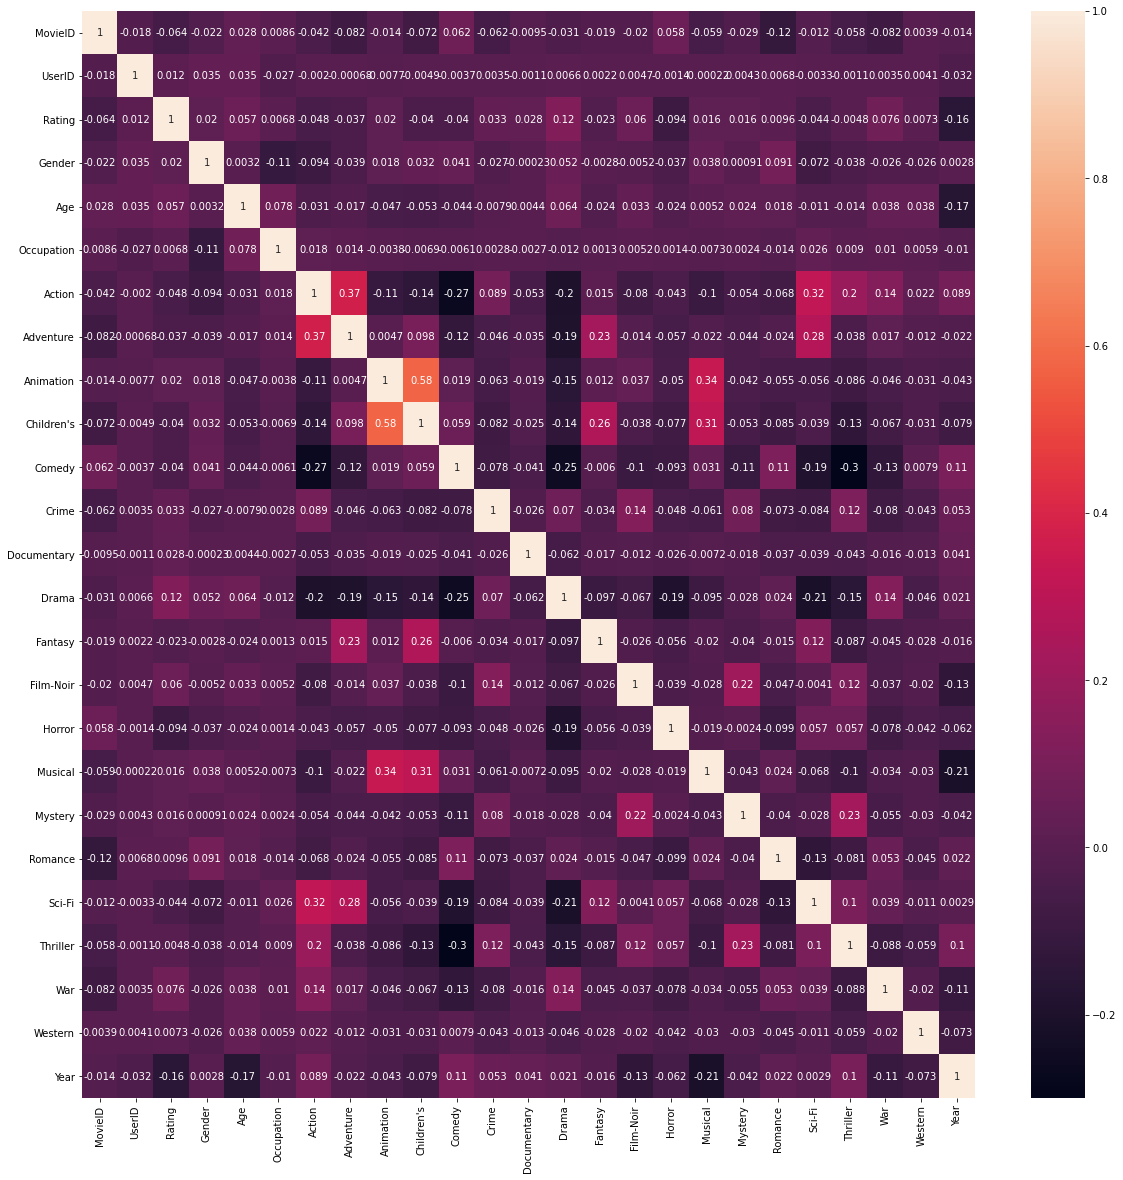

In [50]:
figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [51]:
master_df_m.groupby('Age')['Rating'].mean()

Age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Age'>

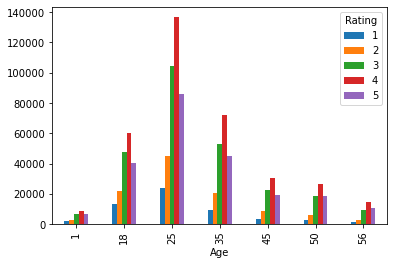

In [52]:
master_df_m.groupby(['Age','Rating']).size().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

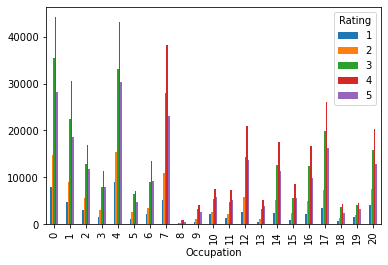

In [53]:

master_df_m.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

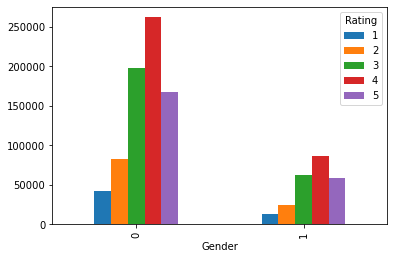

In [54]:
master_df_m.groupby(['Gender','Rating']).size().unstack().plot(kind='bar')

In [55]:
master_df.assign(Genres=master_df.Genres.str.split('|')).explode('Genres')['Genres'].unique()

array(['Animation', "Children's", 'Comedy', 'Musical', 'Romance', 'Drama',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Crime',
       'Thriller', 'Western', 'Horror', 'Mystery', 'Documentary',
       'Film-Noir'], dtype=object)

In [56]:
master_df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

# Develop an appropriate model to predict the movie ratings

In [57]:
master_df_final=master_df.iloc[:1000,:]

In [58]:
Features=master_df_final[['Gender','Age','Occupation']]
Features

Gender  Age  Occupation
0         1    1          10
1         1    1          10
2         1    1          10
3         1    1          10
4         1    1          10
..      ...  ...         ...
995       1   18           3
996       1   18           3
997       1   18           3
998       1   18           3
999       1   18           3

[1000 rows x 3 columns]

In [59]:
Labels=master_df_final['Rating']

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(Features,Labels,test_size=0.30,random_state=42)

In [61]:
X_train.shape

(700, 3)

In [62]:
X_test.shape

(300, 3)

In [63]:
Y_train.shape

(700,)

In [64]:
Y_test.shape

(300,)

# Logistic Regression

In [65]:
lom=LogisticRegression()

In [66]:
model=lom.fit(X_train,Y_train)

C:\Users\sbodicherla164331\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
Y_pred=model.predict(X_test)

In [68]:
model.coef_

array([[ 0.33935012, -0.06704232, -0.14416706],
       [-0.91417302,  0.00394446,  0.01123961],
       [-0.15706464,  0.02676805,  0.03819676],
       [ 0.50636303,  0.02308079,  0.07300192],
       [ 0.22552451,  0.01324901,  0.02172877]])

In [69]:
model.intercept_

array([ 0.22523741, -0.53839567, -0.09078464, -0.14634996,  0.55029286])

In [70]:
accuracy_score(Y_test,Y_pred)

0.4

# RandomForest

In [71]:

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

In [72]:
accuracy_score(Y_test,Y_pred)

0.37666666666666665

In [73]:
svm1=svm.SVC()

In [74]:
svmmodel=svm1.fit(X_train,Y_train)

In [75]:
Y_pred=svmmodel.predict(X_test)

In [76]:
accuracy_score(Y_test,Y_pred)

0.37333333333333335